# SUPPLY CHAIN ASIA. FINAL PROJECT.

### Table of contents: 
#### 1. IMPORTING THE LIBRARIES 
#### 2. DEFINING THE PATH
#### 3. IMPORTING THE DATASET
#### 4. REVENUE IN EACH REGION WITH METHOD OF PAYMENT USED
#### 5. TOTAL ITEMS SOLD BY DEPARTMENT
#### 6. PERCENTAGE OF PENDING ORDERS OUT OF COMPLETED ORDERS
#### 7. MOST EFFICIENT DELIVERY MODE
#### 8. COUNTRIES WITH HIGHEST AND LOWEST SALES
#### 9. MOST EFFICIENT DELIVERY MODE FOR PROFIT
#### 10. IDENTIFICATION OF SCHEDULE DELAY
#### 11. DELIVERY STATUS FROM EVERY REGION
#### 12. DELIVERY STATUS FROM TOP 10 COUNTRIES
#### 13. MOST ORDERED PRODUCT FROM EVERY REGION
#### 14. TOP 10 CITIES WITH FIRST CLASS DELIVERY 

#### 1. IMPORTING THE LIBRARIES 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cluster import KMeans
import pylab as pl

#### 2. DEFINING THE PATH

In [2]:
%matplotlib inline

In [3]:
path = r'C:\Users\gryzu\Supply Chain Management'

In [4]:
path

'C:\\Users\\gryzu\\Supply Chain Management'

#### 3.IMPORTING THE DATASET

In [5]:
path_to_pickle = os.path.join(path, '1 DATA', 'FORMATTED', 'ASIASCM_UPDATED.pkl')

In [6]:
asia = pd.read_pickle(path_to_pickle)

In [8]:
asia.head()

,Type,Days for shipment (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late Delivery Risk,Category Id,Category Name,Department Id,...,Profit Per Order,Order Region,Order State,Order Status,Product Category Id,Product Name,Product Price,Shipping Date,Shipping Mode,Price Category
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,2,...,91.250000,Southeast Asia,Java Occidental,COMPLETE,73,Smart watch,327.75,2018-03-02 22:56:00,Standard Class,Middle price
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,2,...,-249.089996,South Asia,Rajastán,PENDING,73,Smart watch,327.75,2018-01-18 12:27:00,Standard Class,Middle price
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,2,...,-247.779999,South Asia,Rajastán,CLOSED,73,Smart watch,327.75,2018-01-17 12:06:00,Standard Class,Middle price
3,DEBIT,2,1,95.180000,288.420013,Late delivery,1,73,Sporting Goods,2,...,95.180000,Eastern Asia,Guangdong,COMPLETE,73,Smart watch,327.75,2018-01-15 10:42:00,First Class,Middle price
4,TRANSFER,2,1,68.430000,285.140015,Late delivery,1,73,Sporting Goods,2,...,68.430000,Eastern Asia,Guangdong,PROCESSING,73,Smart watch,327.75,2018-01-15 10:21:00,First Class,Middle price


In [14]:
asia.columns

Index(['Type', 'Days for shipment (real)', 'Days for shipment (scheduled)',
       'Benefit per order', 'Sales per customer', 'Delivery Status',
       'Late Delivery Risk', 'Category Id', 'Category Name', 'Department Id',
       'Department Name', 'Market', 'Order City', 'Order Country',
       'Order Date', 'Item Profit Ratio', 'Item Quantity', 'Sales',
       'Items Total', 'Profit Per Order', 'Order Region', 'Order State',
       'Order Status', 'Product Category Id', 'Product Name', 'Product Price',
       'Shipping Date', 'Shipping Mode', 'Price Category'],
      dtype='object')

#### 4. REVENUE IN EACH REGION WITH METHOD OF PAYMENT USED

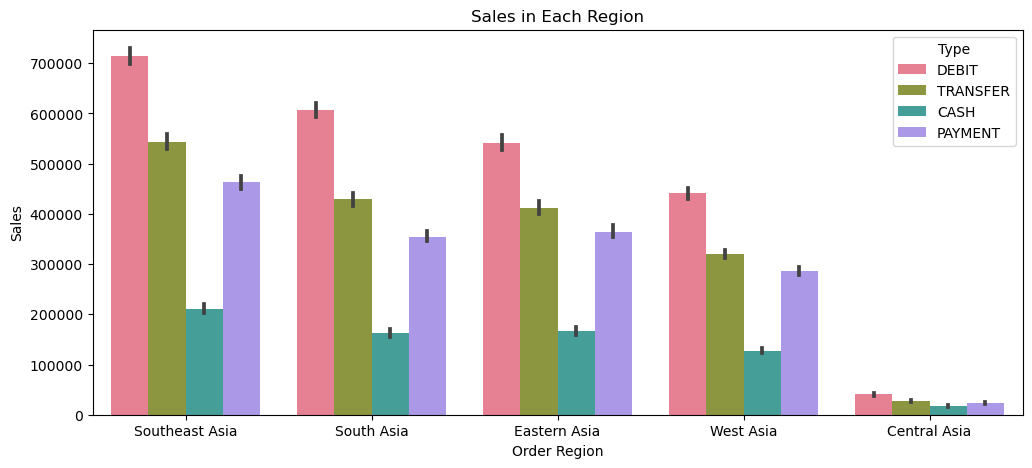

In [21]:
# Revenue in Each Region
plt.figure(figsize=(12,5))
sns.barplot(data=asia, x='Order Region', y='Sales', hue='Type', 
            estimator='sum', palette='husl' )
plt.title('Sales in Each Region')
plt.show()

#### 5. TOTAL ITEMS SOLD BY DEPARTMENT

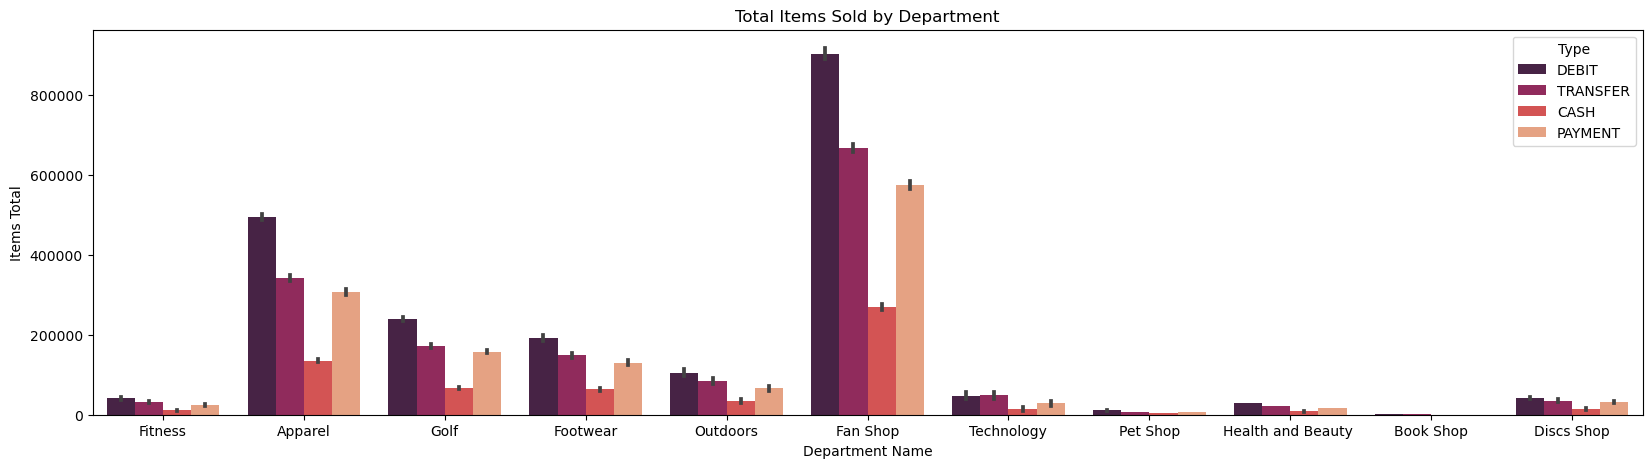

In [19]:
# Total Items Sold by Department
plt.figure(figsize=(20,5))
sns.barplot(data=asia, x='Department Name', y='Items Total', hue='Type', 
            estimator='sum', palette='rocket' )
plt.title('Total Items Sold by Department')
plt.show()

#### 6. PERCENTAGE OF PENDING ORDERS OUT OF COMPLETED ORDERS

In [22]:
# Count the number of 'COMPLETE' orders
complete_count = asia[asia['Order Status'] == 'COMPLETE'].shape[0]

In [23]:
# Count the number of 'PENDING' orders
pending_count = asia[asia['Order Status'] == 'PENDING'].shape[0]

In [24]:
# Calculate the percentage of 'PENDING' orders out of 'COMPLETE' orders
pending_percentage = (pending_count / complete_count) * 100

In [25]:
print(f"Percentage of pending orders out of complete orders: {pending_percentage:.2f}%")

Percentage of pending orders out of complete orders: 35.75%


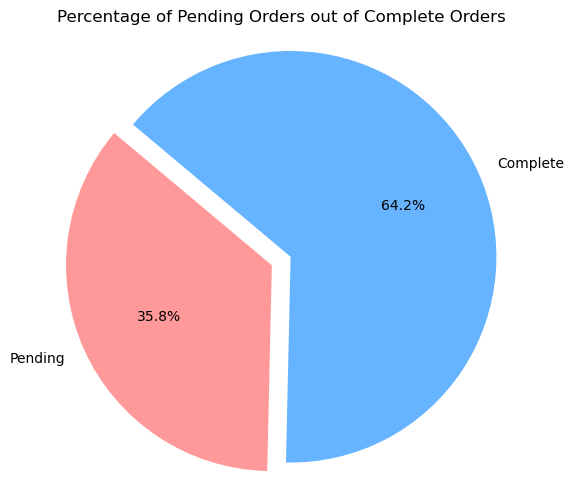

In [26]:
# Plotting
labels = ['Pending', 'Complete']
sizes = [pending_percentage, 100-pending_percentage]
colors = ['#ff9999','#66b3ff']
explode = (0.1, 0)  

plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Pending Orders out of Complete Orders')
plt.axis('equal')  
plt.show()

#### 7. MOST EFFICIENT DELIVERY MODE

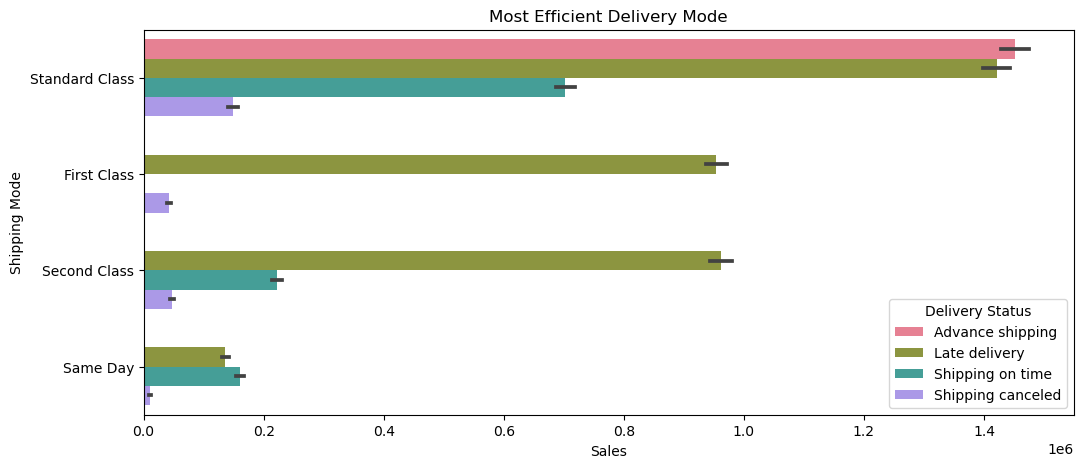

In [30]:
# Efficient Delivery Method 
plt.figure(figsize=(12,5))
sns.barplot(data=asia, x='Sales', y='Shipping Mode', hue='Delivery Status', 
            estimator='sum', palette='husl' )
plt.title('Most Efficient Delivery Mode')
plt.show()

#### 8. COUNTRIES WITH HIGHEST AND LOWEST SALES

In [31]:
# Grouping by 'Order Country' and calculating total sales for each country
country_sales = asia.groupby('Order Country')['Sales'].sum().reset_index()

In [32]:
# Finding the country with the highest sales
highest_sales_country = country_sales.loc[country_sales['Sales'].idxmax()]

In [33]:
# Finding the country with the lowest sales
lowest_sales_country = country_sales.loc[country_sales['Sales'].idxmin()]

In [34]:
print("Country with the highest sales:", highest_sales_country['Order Country'])
print("Country with the lowest sales:", lowest_sales_country['Order Country'])

Country with the highest sales: China
Country with the lowest sales: Kuwait


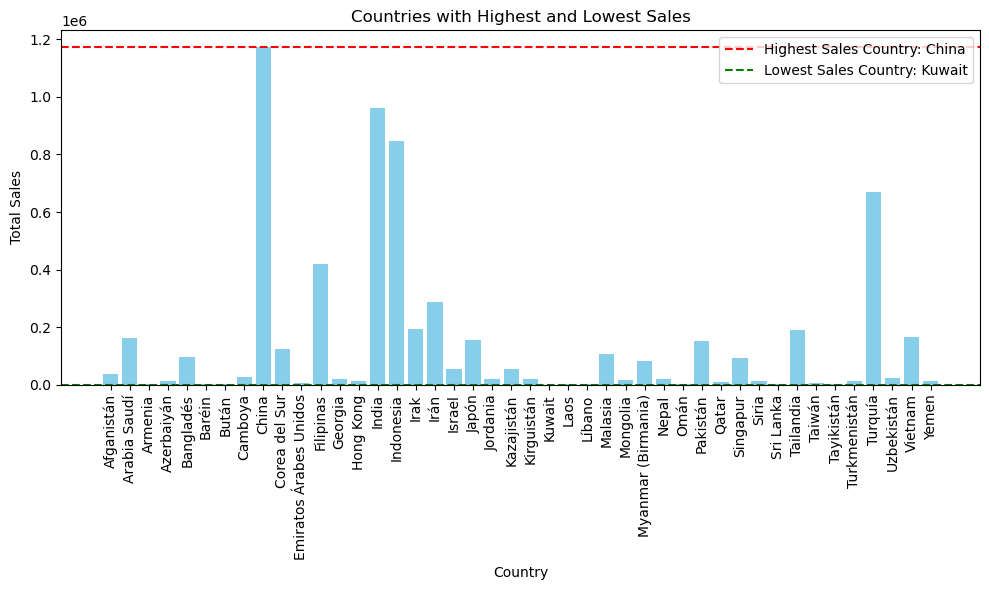

In [35]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(country_sales['Order Country'], country_sales['Sales'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.title('Countries with Highest and Lowest Sales')
plt.xticks(rotation=90)
plt.axhline(y=highest_sales_country['Sales'], color='red', linestyle='--', label='Highest Sales Country: ' + highest_sales_country['Order Country'])
plt.axhline(y=lowest_sales_country['Sales'], color='green', linestyle='--', label='Lowest Sales Country: ' + lowest_sales_country['Order Country'])
plt.legend()
plt.tight_layout()
plt.show()

#### 9. MOST EFFICIENT DELIVERY MODE FOR PROFIT

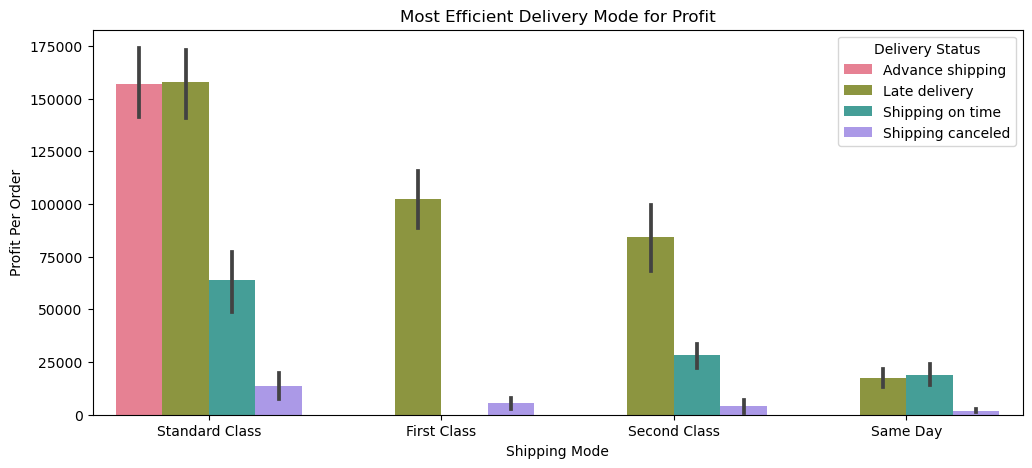

In [38]:
# Efficient Delivery Method Towards Profit
plt.figure(figsize=(12,5))
sns.barplot(data=asia, x='Shipping Mode', y='Profit Per Order', hue='Delivery Status', 
            estimator='sum', palette='husl' )
plt.title('Most Efficient Delivery Mode for Profit')
plt.show()

#### 10. IDENTIFICATION OF SCHEDULE DELAY

In [39]:
# Calculate the difference between 'Days for shipment (real)' and 'Days for shipment (scheduled)'
asia['Delivery Delay'] = asia['Days for shipment (real)'] - asia['Days for shipment (scheduled)']

In [40]:
# Find the average days of delivery (real vs scheduled)
average_delivery_delay = asia['Delivery Delay'].mean()

In [41]:
print("Average days of delivery (real vs scheduled):", average_delivery_delay)

Average days of delivery (real vs scheduled): 0.5736371817948058


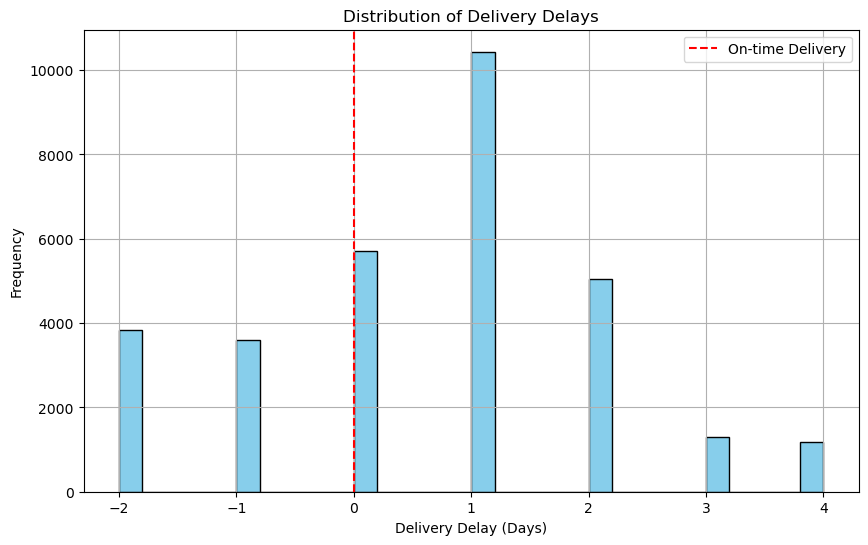

In [42]:
# Plotting
plt.figure(figsize=(10, 6))
plt.hist(asia['Delivery Delay'], bins=30, color='skyblue', edgecolor='black')
plt.axvline(x=0, color='red', linestyle='--', label='On-time Delivery')
plt.xlabel('Delivery Delay (Days)')
plt.ylabel('Frequency')
plt.title('Distribution of Delivery Delays')
plt.legend()
plt.grid(True)
plt.show()

#### 11. DELIVERY STATUS FROM EVERY REGION

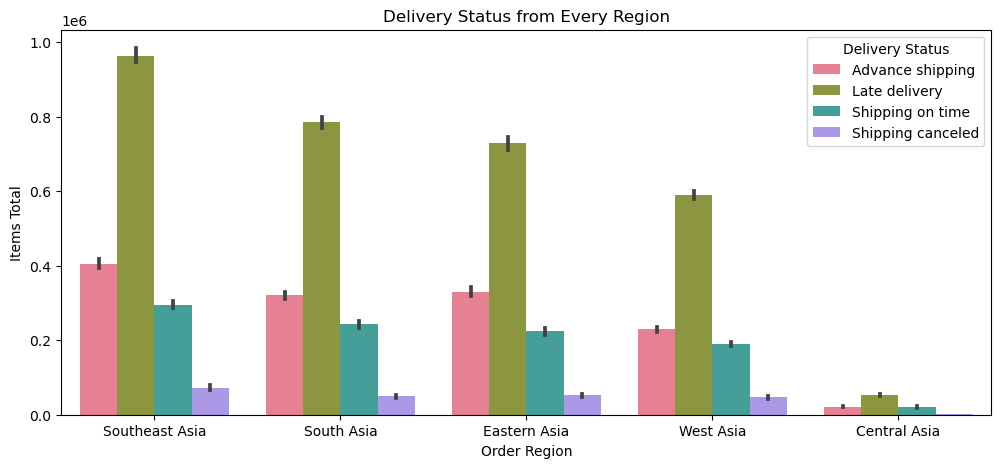

In [45]:
# Delivery Status from Every Region
plt.figure(figsize=(12,5))
sns.barplot(data=asia, x='Order Region', y='Items Total', hue='Delivery Status', 
            estimator='sum', palette='husl' )
plt.title('Delivery Status from Every Region')
plt.show()

#### 12. DELIVERY STATUS FROM TOP 10 COUNTRIES

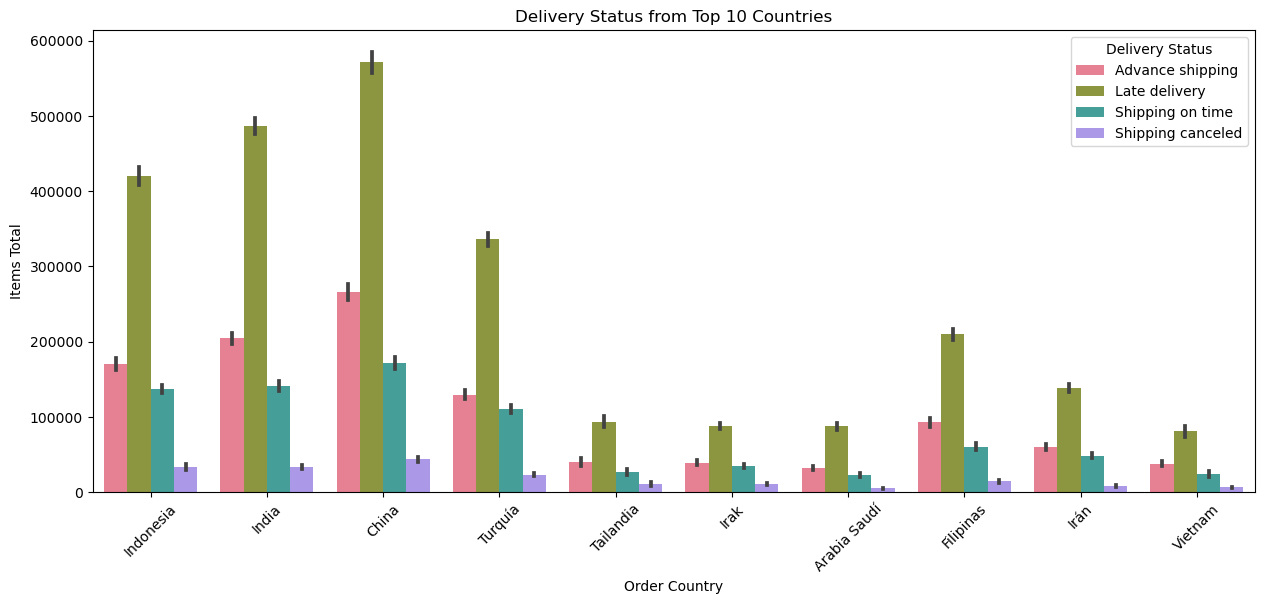

In [48]:
# Calculate total sales for each country
country_sales = asia.groupby('Order Country')['Items Total'].sum().reset_index()

# Select top 10 countries based on total sales
top_10_countries = country_sales.nlargest(10, 'Items Total')['Order Country']

# Filter DataFrame to include only data for top 10 countries
asia_top_10 = asia[asia['Order Country'].isin(top_10_countries)]

# Plotting
plt.figure(figsize=(15, 6))
sns.barplot(data=asia_top_10, x='Order Country', y='Items Total', hue='Delivery Status', 
            estimator='sum', palette='husl' )
plt.title('Delivery Status from Top 10 Countries')
plt.xticks(rotation=45)
plt.show()

#### 13. MOST ORDERED PRODUCT FROM EVERY REGION

In [49]:
# Grouping by 'Order Region' and finding the product name with the highest total sales in each region
most_delivered_products = asia.groupby('Order Region')['Product Name'].agg(lambda x: x.value_counts().index[0])

print("Product Name Mostly Delivered in Each Region:")
print(most_delivered_products)

Product Name Mostly Delivered in Each Region:
Order Region
Central Asia      Nike Men's CJ Elite 2 TD Football Cleat
Eastern Asia             Perfect Fitness Perfect Rip Deck
South Asia               Perfect Fitness Perfect Rip Deck
Southeast Asia           Perfect Fitness Perfect Rip Deck
West Asia                Perfect Fitness Perfect Rip Deck
Name: Product Name, dtype: object


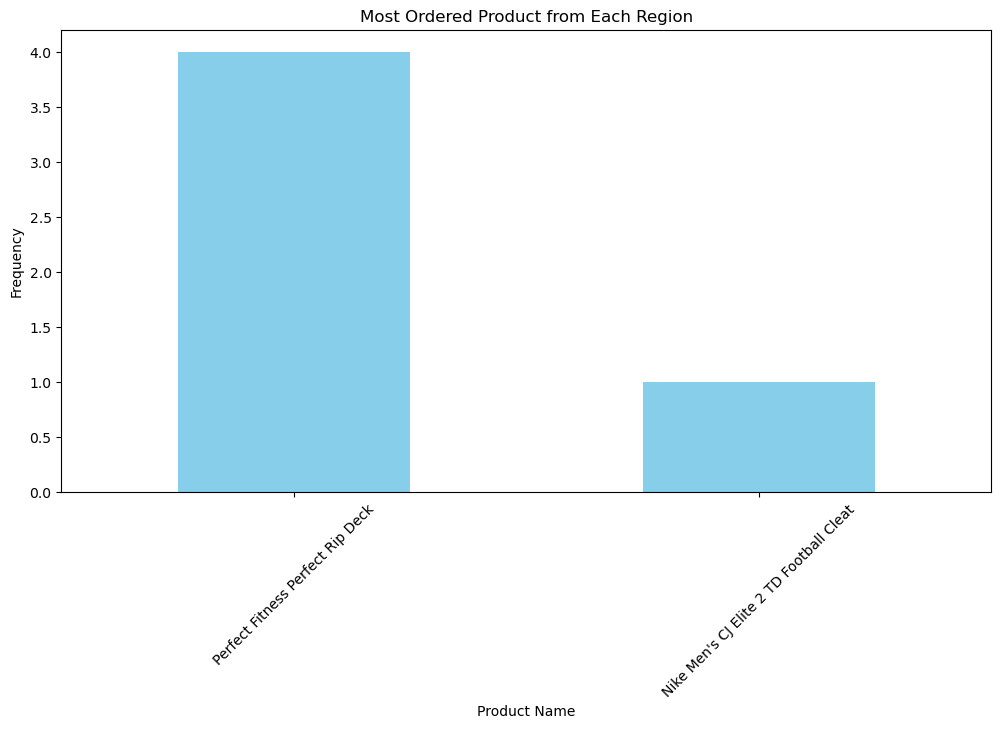

In [51]:
# Plotting
plt.figure(figsize=(12, 6))
most_delivered_products.value_counts().plot(kind='bar', color='skyblue')
plt.title('Most Ordered Product from Each Region')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

#### 14.TOP 10 CITIES WITH FIRST CLASS DELIVERY 

In [52]:
# Filter the data for orders with 'First Class' shipping mode
first_class_orders = asia[asia['Shipping Mode'] == 'First Class']

# Grouping by 'Order City' and calculating total sales for each city
city_sales = first_class_orders.groupby('Order City')['Sales'].sum().reset_index()

# Selecting the top 10 cities with the highest total sales
top_10_cities = city_sales.nlargest(10, 'Sales')

print("Top 10 Cities for First Class Delivery:")
print(top_10_cities)

Top 10 Cities for First Class Delivery:
           Order City         Sales
278            Manila  43972.480807
458           Yakarta  31083.730548
50            Bangkok  27895.970589
392          Surabaya  20358.010376
134          Estambul  19761.050385
172  Ho Chi Minh City  18711.460329
385          Singapur  15427.400260
40             Bagdad  15146.210354
285             Medan  13971.870260
346            Riyadh  13243.400238


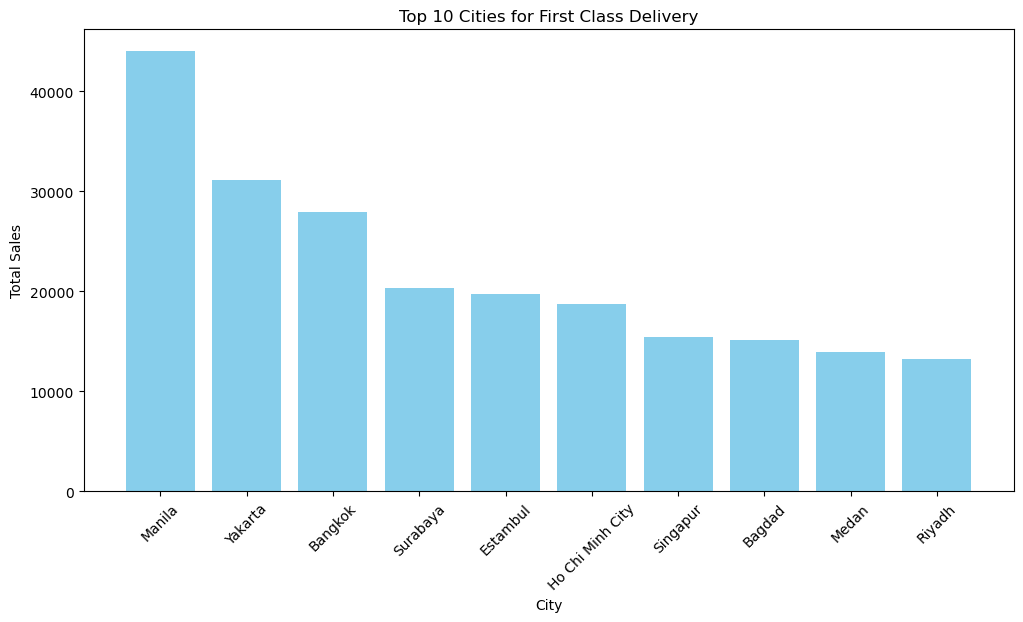

In [53]:
# Plotting
plt.figure(figsize=(12, 6))
plt.bar(top_10_cities['Order City'], top_10_cities['Sales'], color='skyblue')
plt.title('Top 10 Cities for First Class Delivery')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()